## INITIALIZATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1588,1588,5892,1980,S1,Menikah,34968000.0,1,0,10-04-2013,11,...,7,0,0,0,0,0,0,3,11,0
1178,1178,2918,1981,S1,Cerai,28510000.0,1,1,13-04-2013,72,...,5,0,0,0,0,0,0,3,11,0
27,27,5255,1986,S1,Lajang,NaN,1,0,20-02-2013,19,...,1,0,0,0,0,0,0,3,11,0
1354,1354,2407,1982,S1,Menikah,69109000.0,0,0,09-11-2012,10,...,4,0,0,1,0,0,0,3,11,1
761,761,6887,1967,S1,Lajang,79146000.0,1,1,24-04-2014,33,...,6,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df = df.drop('Unnamed: 0', axis='columns')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Feature Engineer

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['age'] = 2022 - df['Year_Birth']
df['join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['total_kids'] > 0, 1, 0)

# age_range
df.loc[(df['age'] >= 0) & (df['age'] < 12), 'age_range'] = "child"
df.loc[(df['age'] >= 12) & (df['age'] < 18), 'age_range'] = "teens"
df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_range'] = "young_adults"
df.loc[(df['age'] >= 36) & (df['age'] < 55), 'age_range'] = "middle_aged_adults"
df.loc[(df['age'] >= 55), 'age_range'] = "older_adults"

# amount spent
df['total_amount_spent'] = df['MntCoke'] \
                              + df['MntFruits'] \
                              + df['MntMeatProducts'] \
                              + df['MntFishProducts'] \
                              + df['MntSweetProducts'] \
                              + df['MntGoldProds']
# accepted campaigns
df['total_accepted_campaign'] = df['AcceptedCmp1'] \
                                    + df['AcceptedCmp2'] \
                                    + df['AcceptedCmp3'] \
                                    + df['AcceptedCmp4'] \
                                    + df['AcceptedCmp5']

# total transaction purchased --- WE ASSUMED ALL OF THIS PURCHASES ARE MECE (mutually exclusive and collectively exhaustive)
df['total_transaction'] = df['NumDealsPurchases'] \
                            + df['NumWebPurchases'] \
                            + df['NumCatalogPurchases'] \
                            + df['NumStorePurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

df['convertion_rate'] = df.apply(lambda x: safe_div(x['total_transaction'],x['NumWebVisitsMonth']), axis=1)

In [7]:
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
                      'age', 'join_at_age', 'total_kids', 'total_amount_spent'
                     ]

categorical_features = ['Education', 'Marital_Status',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Response', 'is_parents', 'age_range'
                       ]

In [8]:
df[numerical_features].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,join_at_age,total_kids,total_amount_spent
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,...,4.084821,2.662054,5.790179,5.316518,3.0,11.0,53.194196,44.222321,0.950446,6.057982e+05
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,...,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,12.022855,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,26.000000,16.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,2.000000,0.000000,3.000000,3.000000,3.0,11.0,45.000000,36.000000,0.000000,6.875000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,...,4.000000,2.000000,5.000000,6.000000,3.0,11.0,52.000000,43.000000,1.000000,3.960000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,...,6.000000,4.000000,8.000000,7.000000,3.0,11.0,63.000000,54.000000,1.000000,1.045500e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,27.000000,28.000000,13.000000,20.000000,3.0,11.0,129.000000,121.000000,3.000000,2.525000e+06


In [9]:
df[categorical_features].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,is_parents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Bivariate Analysis

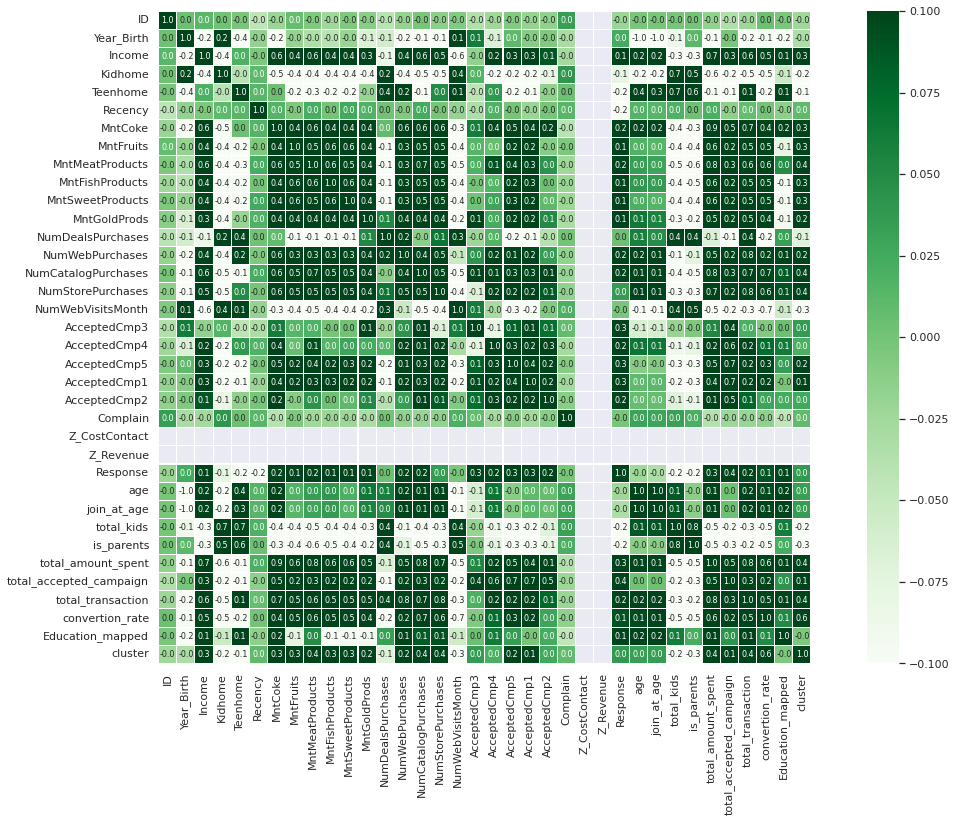

In [58]:
# correlation heatmap
plt.figure(figsize=(20, 12))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='Greens', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

(0.0, 120000000.0)

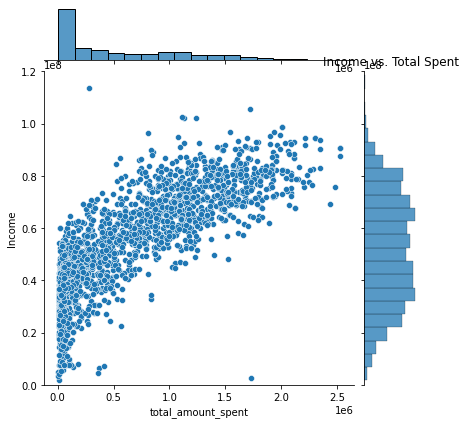

In [11]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"])
plt.title('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

(0.0, 120000000.0)

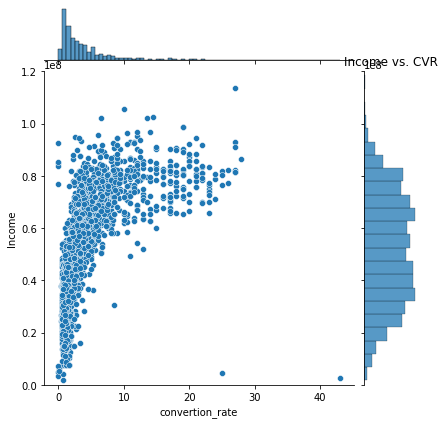

In [12]:
plot = sns.jointplot(x=df["convertion_rate"], y=df["Income"])
plt.title('Income vs. CVR')
plot.ax_marg_y.set_ylim(0, 120000000)

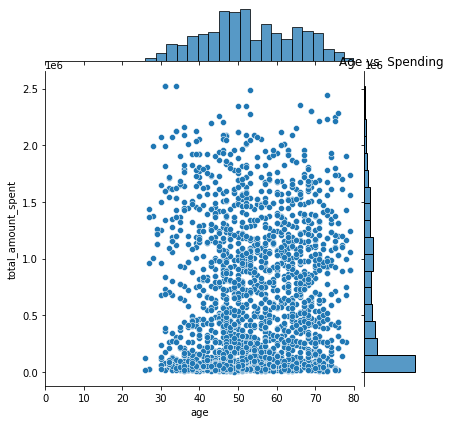

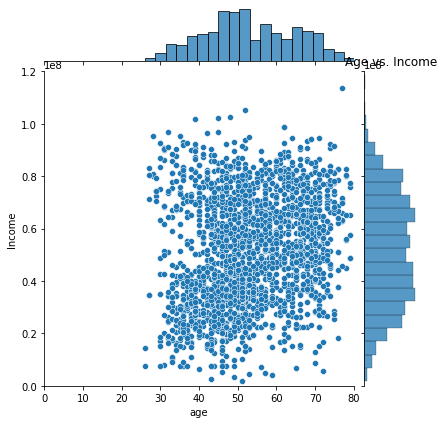

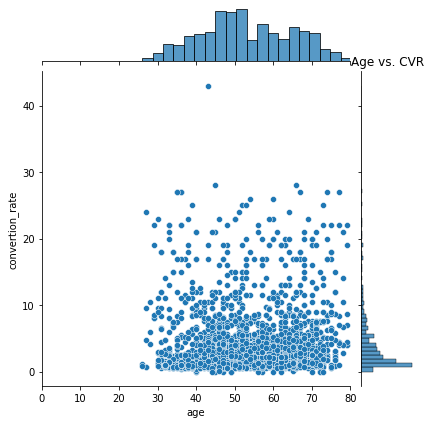

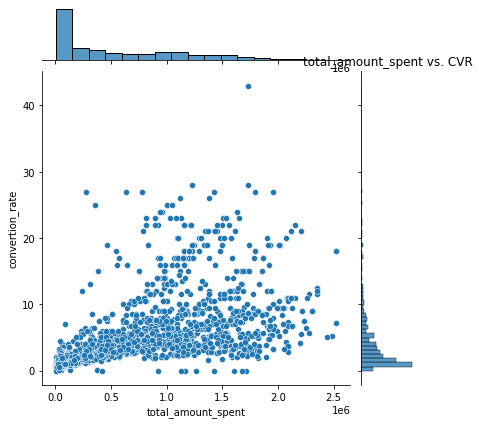

In [13]:
plot = sns.jointplot(x=df["age"], y=df["total_amount_spent"])
plt.title('Age vs. Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["age"], y=df["Income"])
plt.title('Age vs. Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

plot = sns.jointplot(x=df["age"], y=df["convertion_rate"])
plt.title('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["total_amount_spent"], y=df["convertion_rate"])
plt.title('total_amount_spent vs. CVR')
# plot.ax_marg_x.set_xlim(0, 80)
plt.show()

In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'join_at_age', 'total_kids', 'is_parents', 'age_range',
       'total_amount_spent', 'total_accepted_campaign', 'total_transaction',
       'convertion_rate'],
      dtype='object')

# Preprocessing

In [15]:
df.isna().sum()

ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                     24
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
age                         0
join_at_age                 0
total_kids                  0
is_parents                  0
age_range 

In [16]:
df = df.dropna()

In [17]:
df.duplicated().sum()

0

In [20]:
df.shape

(2216, 38)

In [22]:
for col in categorical_features:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
0    2074
1     142
Name: AcceptedCmp1, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
0    2186
1      30
Name: AcceptedCmp2, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
0    2053
1     163
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
0    2052
1     164
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
0    2054
1     162
Name: AcceptedCmp5, dtype: int64
------------------------------ 

value counts o

In [24]:
# label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)

In [26]:
df_cats = df[['Education']].copy()
# One hot encoder
for cat in ['Marital_Status', 'age_range', 'is_parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df_cats = df_cats.join(onehots)

In [29]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numerical_features:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head(3))

(2216, 39)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,age,join_at_age,total_kids,is_parents,age_range,total_amount_spent,total_accepted_campaign,total_transaction,convertion_rate,Education_mapped
0,5524,1957,S1,Lajang,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,0.978226,...,0.986443,0.897752,-1.264803,0,older_adults,1.675488,0,25,3.571429,2
1,2174,1954,S1,Lajang,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,-0.872024,...,1.236801,1.313688,1.405806,1,older_adults,-0.962358,0,6,1.200000,2
2,4141,1965,S1,Bertunangan,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,...,0.318822,0.315443,-1.264803,0,older_adults,0.280250,0,21,5.250000,2


## MODELING

[104357.21965506373, 77987.73445441775, 61652.36836583122, 55343.156383630136, 50312.12964007013, 46904.70089464342, 43896.02029590342, 41424.98383228289, 40017.362973949756, 38809.05267700291, 37629.417075887555, 36804.63151040448, 35881.145593858724, 35182.219068302846, 34450.105204043604, 33813.88775651713, 33257.33901476104, 32662.890141160482]


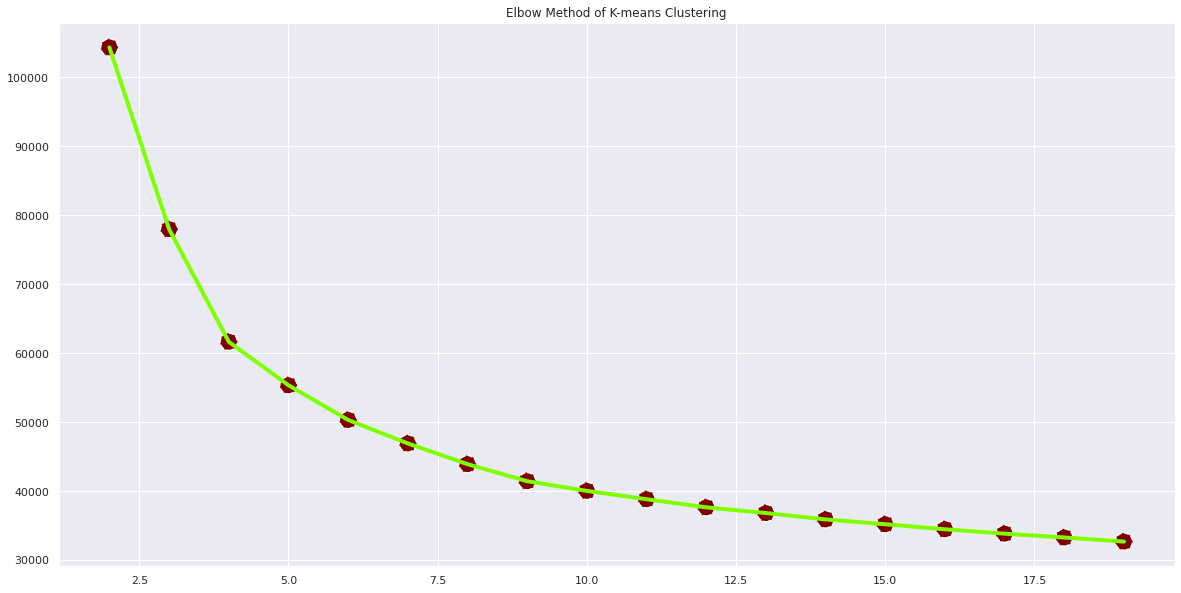

In [57]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'age_range', 'Dt_Customer']).copy()
# X = dataset_scaled[numerical_features].copy()
inertia = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=inertia, color='#7FFF00', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

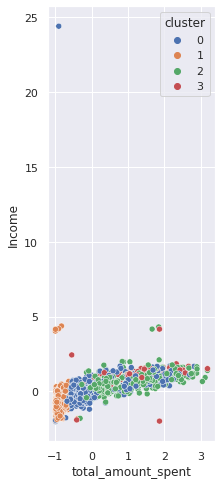

In [56]:
sns.scatterplot(data=X, x='total_amount_spent', y='Income', hue='cluster', palette="deep")

In [54]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='PuOr')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

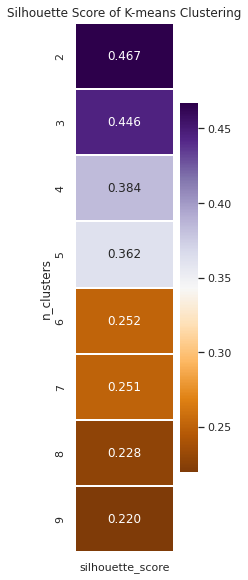

In [55]:
visualize_silhouette_layer(X)

In [35]:
numerical_features

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'age',
 'join_at_age',
 'total_kids',
 'total_amount_spent']

In [36]:
df[numerical_features+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

Income                                                                 \
         count          mean           std        min         25%         50%   
cluster                                                                         
0        600.0  5.915598e+07  2.907067e+07  1730000.0  47159000.0  57313000.0   
1        915.0  3.376977e+07  1.430822e+07  3502000.0  24736500.0  33402000.0   
2        564.0  6.846531e+07  1.320797e+07  7144000.0  60407500.0  68117500.0   
3        137.0  7.863174e+07  1.416946e+07  2447000.0  72679000.0  80124000.0   

                                 total_amount_spent                \
                75%          max              count          mean   
cluster                                                             
0        68722500.0  666666000.0              600.0  7.172950e+05   
1        41020500.0  162397000.0              915.0  7.612787e+04   
2        76738500.0  160803000.0              564.0  1.185512e+06   
3        83829000.0  157146000.0              137.0  1.289168e+06   

                                                                             
                   std       min       25%        50%        75%        max  
cluster                                                                      
0        493792.719730    8000.0  346000.0   506000.0  1035250.0  2302000.0  
1         71647.141976    5000.0   36000.0    57000.0    96000.0  1376000.0  
2        444518.680991  415000.0  833500.0  1110500.0  1486250.0  2524000.0  
3        432624.303275  277000.0  988000.0  1216000.0  1574000.0  2525000.0

In [38]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

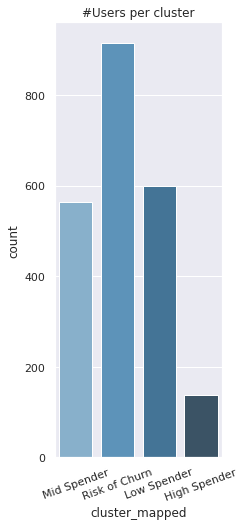

In [39]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df['cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=20)

(0.0, 120000000.0)

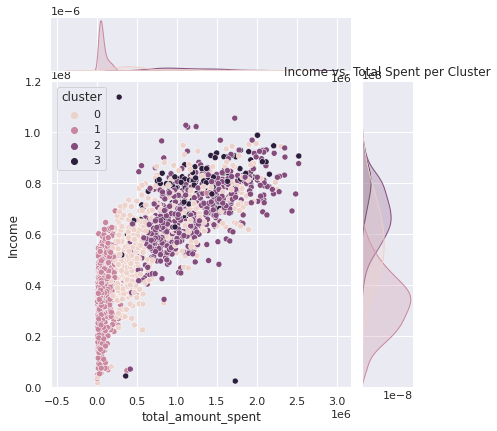

In [41]:
plot = sns.jointplot(x=df["total_amount_spent"], y=df["Income"], hue=df["cluster"])
plt.title('Income vs. Total Spent per Cluster')
plot.ax_marg_y.set_ylim(0, 120000000)

(0.0, 120000000.0)

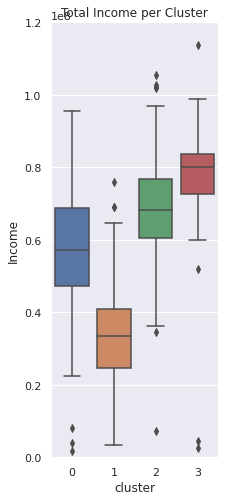

In [59]:
sns.boxplot(x=df['cluster'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

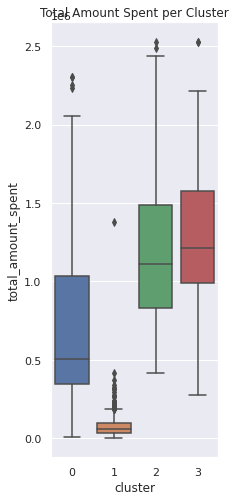

In [60]:
sns.boxplot(x=df['cluster'], y=df['total_amount_spent'])
plt.title('Total Amount Spent per Cluster')

Text(0.5, 1.0, 'Total Visit Web per Cluster')

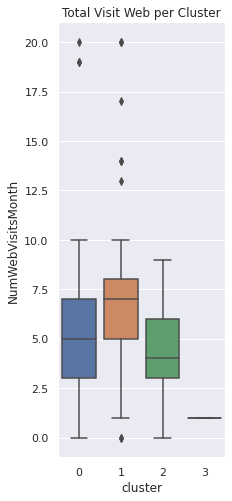

In [61]:
sns.boxplot(x=df['cluster'], y=df['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

Text(0.5, 1.0, 'Deal Puchased per Cluster')

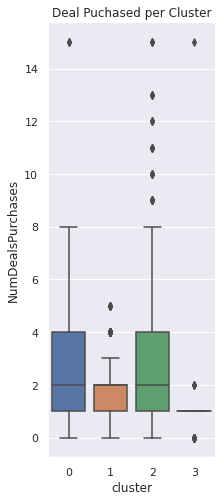

In [62]:
sns.boxplot(x=df['cluster'], y=df['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

Text(0.5, 1.0, 'CVR per Cluster')

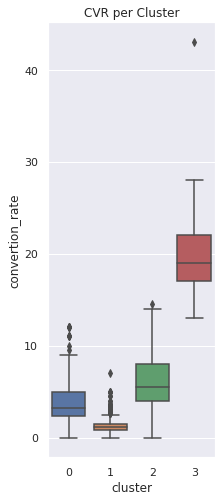

In [63]:
sns.boxplot(x=df['cluster'], y=df['convertion_rate'])
plt.title('CVR per Cluster')

# Hitungan

In [47]:
df[df.cluster == 3].total_amount_spent.sum()

176616000

In [48]:
df[df.cluster == 3].total_amount_spent.sum() / df[df.cluster == 3].total_transaction.sum()

66372.04058624577

In [50]:
df[df.cluster == 2].total_amount_spent.sum()

668629000

In [51]:
df[df.cluster == 2].total_amount_spent.sum() / df[df.cluster == 2].total_transaction.sum()

48304.363531281604

In [52]:
# jumlah yang dapat di save jika dapat optimasi promo cost (asumsi: target reduce 50%)
(df[df.cluster == 2].total_amount_spent.sum() / df[df.cluster == 2].total_transaction.sum()) * df[df.cluster == 2].NumDealsPurchases.sum()

81151330.7325531

In [53]:
81151330*0.5

40575665.0

# Interpretation

1. Low Spender:
- Didominasi oleh kelompok usia >55 tahun dan 36-55 tahun
- cukup sering mencari promo yang masing-masing orangnya membeli promo 2 kali dalam sebulan (median)
- mempunyai total pendapatan dan pengeluaran yang kecil


2. Risk of Churn:
- Kelompok dengan jumlah user terbesar sebanyak 900 orang yang di dominasi oleh usia 36-55 tahun
- Mempunyai pendapatan dan pengeluaran paling kecil di setiap bulannya.
- Kelompok yang paling sering mengunjungi web dengan median total kunjungan 7 kali dalam sebulan. Namun, jarang melakukan transaksi
- Tidak banyak merespon campaign


3. Mid Spender:
- Didominasi oleh usia >55 tahun dan 36-55 tahun
- Memmpunyai total pendapatan dan pengeluaran terbesar kedua dibandingkan Kelompok lainnya
- Walaupun cukup jarang untuk visit web, namun paling sering merespon campaign dan menggunakan promo dalam sebulannya


4. High Spender:
- Kelompok dengan jumlah user terkecil sebanyak 137 orang yang di dominasi oleh usia >55 tahun) dan 36-55 tahun
- Mempunyai pendapatan dan pengeluaran paling besar di setiap bulannya
- Jumlah penggunaan promo paling sedikit dibandingkan dengan yang lainnya.
- Mempunyai conversion rate terbesar untuk membeli produk, (perlu dijaga keloyalannya)

# Recommendation & Potential Impact

Recommendation:
1. Aktif memonitor transaksi untuk kelompok High Spender, peningkatan service perlu dilakukan
2. Dilakukan analisis lanjut untuk mid spender agar terjadi peningkatan transaksi dengan memberikan rekomendasi yang tepat
3. Untuk kelompok Low Spender dan Risk to Churn, dapat dilakukan analisis general, mengingat jumlah visit yang cukup tinggi tapi tidak melakukan transaksi. Mungkin segmentasi promo tidak sesuai.

Potential Impact:
- Potential GMV High Spender sebesar IDR 176 Juta, sedangkan untuk kelompok Mid Spender hanya sekitar IDR 66 Juta
- Reduksi cost sebesar IDR 50 juta dapat dilakukan apabila dapat melakukan optimasi promo pada kelompok mid spender 